#### Business Objective: What was the impact of the COVID-19 pandemic on the level of home court advantage?
- Question 1: How has the difference in win-loss ratio between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)
- Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)
- Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)
- Question 4: How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)
- Question 5: How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

In [10]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

con = sqlite3.connect("data/nba.sqlite")

seasons = ['2019', '2020', '2021', '2022']

Question 1

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

In [12]:
covid_wl = pd.read_sql_query("SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22019, 22020, 22021, 22022) ORDER BY season_id DESC", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

count_win = 1

# calculating the winning percentage of home and away game
def winning_percentage(game_column):
    game_list = covid_wl[game_column].to_list()
    total = len(game_list)
    win = game_list.count(count_win)
    return win / total

# home winning percentage
home_game = winning_percentage('wl_home')
# away winning percentage
away_game = winning_percentage('wl_away')

home_away_winning_percentage = {'Home Winning Percentage': [home_game],
                            'Away Winning Percentage': [away_game]}
home_away_winning_percentage = pd.DataFrame(home_away_winning_percentage)

ax = sns.barplot(data=home_away_winning_percentage)
ax.set_title('home and away winning percentage', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('win percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

DatabaseError: Execution failed on sql 'SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22019, 22020, 22021, 22022) ORDER BY season_id DESC': no such table: game

Rising Action: The first statistic we reviewed was the difference in win-loss ratio between home and away teams. In the 2019-20 season, the home team won 55.1% of games while the away team won 44.8%. While this does indicate a definite advantage towards the home team, the away team still has a decent chance of winning. This season was the last "normal" season before COVID, with the 2020-21 season cut short and resumed in a bubble and the 2021-22 season played without spectators in the team's usual arenas. While those restrictions would be assumed to have a significant impact on the win-loss ratio, our findings did not support that assumption.

In [6]:
covid_wl_19 = pd.read_sql_query("SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22019) ORDER BY season_id DESC", con)
covid_wl_19 = covid_wl_19.replace('W', 1)
covid_wl_19 = covid_wl_19.replace('L', 0)

covid_wl_19_group = covid_wl_19.groupby(['season_id']).agg({'wl_home': ['mean'], 'wl_away': ['mean']})

ax = sns.barplot(data=covid_wl_19_group)
ax.set_title('home and away win percentage (2019-20 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean win percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()


DatabaseError: Execution failed on sql 'SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22019) ORDER BY season_id DESC': no such table: game

Climax: In the 2020-21 and 2021-22 seasons, the home team win-loss ratio decreased slightly to 54.3% and 54.4% respectively. However, that decrease does not appear to be significant enough to support the assumption described above. Similarly, while the away team win-loss ratio increased slightly to 45.6% in both seasons that decrease is not significant enough to indicate a shift in home court advantage. Home teams still had a significant advantage over away teams, regardless of whether the game was played without fans or in a bubble.

In [9]:
covid_wl_20 = pd.read_sql_query("SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22021, 22020) ORDER BY season_id DESC", con)
covid_wl_20 = covid_wl_20.replace('W', 1)
covid_wl_20 = covid_wl_20.replace('L', 0)

covid_wl_20_group = covid_wl_20.groupby(['season_id']).agg({'wl_home': ['mean'], 'wl_away': ['mean']})
covid_wl_20_group.columns = ['home', 'away']
covid_wl_20_group = covid_wl_20_group.reset_index()
covid_wl_melt = pd.melt(covid_wl_20_group, id_vars=['season_id'], value_vars=['home', 'away'], var_name='team status', value_name='mean win percentage')

ax = sns.barplot(data=covid_wl_melt, x='season_id', y='mean win percentage', hue='team status')
ax.set_title('home and away win percentage (2020-21 and 2021-22 seasons)', fontsize=14)
ax.set_xlabel('season', fontsize=12)
ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)
plt.show()


DatabaseError: Execution failed on sql 'SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22021, 22020) ORDER BY season_id DESC': no such table: game

Falling Action: While the 2020-21 and 2021-22 seasons did not include a significant change in the magnitude of home court advantage, the 2022-23 season may have. The home team win-loss ratio increased by 3.6 points to 58%. This may be due to spectators returning to arenas following the lifting of most COVID restrictions. Alternatively, this may be due to away teams being less used to home fans. Additional research is necessary to determine the cause of this increase.

In [13]:
covid_wl_22 = pd.read_sql_query("SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22022) ORDER BY season_id DESC", con)
covid_wl_22 = covid_wl_22.replace('W', 1)
covid_wl_22 = covid_wl_22.replace('L', 0)

covid_wl_22_group = covid_wl_22.groupby(['season_id']).agg({'wl_home': ['mean'], 'wl_away': ['mean']})

ax = sns.barplot(data=covid_wl_22_group)
ax.set_title('home and away win percentage (2022-23 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean win percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()


DatabaseError: Execution failed on sql 'SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22022) ORDER BY season_id DESC': no such table: game

Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons do not appear to have had a significant impact on home court advantage as measured by the difference in win-loss ratio between home and away teams. We recommend additional research to determine if the full return of fans in the 2022-23 seasons led to the observed increase in the ratio.

Question 2

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\1746301836.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)


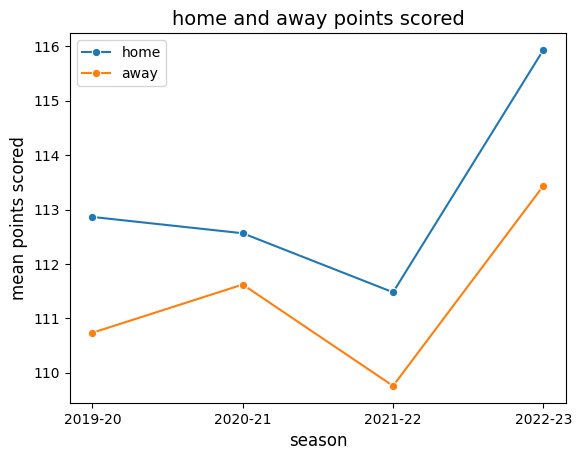

In [10]:
covid_pts = pd.read_sql_query("SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id IN (22019, 22020, 22021, 22022) ORDER BY season_id DESC", con)

covid_pts_group = covid_pts.groupby(['season_id']).agg({'pts_home': ['mean'], 'pts_away': ['mean']})
covid_pts_group.columns = ['home', 'away']

sns.lineplot(data=covid_pts_group, x='season_id', y='home', label='home', marker='o')
ax = sns.lineplot(data=covid_pts_group, x='season_id', y='away', label='away', marker='o')
ax.set_title('home and away points scored', fontsize=14)
ax.set_xlabel('season', fontsize=12)
ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)
ax.set_ylabel('mean points scored', fontsize=12)
plt.show()

Rising Action: The second statistic we reviewed was the difference in average points scored by the home and away teams in each season. In the 2019-20 season, home teams scored an average of 2.04 points more than away teams, with half of all home scores falling between 100 points and 120 points. While this does indicate a consistent home team advantage on average, it was not a significant advantage.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\3365984339.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


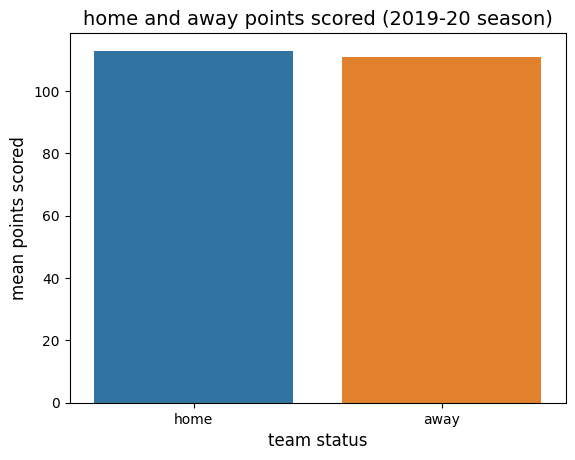

In [13]:
covid_pts_19 = pd.read_sql_query("SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id IN (22019) ORDER BY season_id DESC", con)

covid_pts_19_group = covid_pts_19.groupby(['season_id']).agg({'pts_home': ['mean'], 'pts_away': ['mean']})

ax = sns.barplot(data=covid_pts_19_group)
ax.set_title('home and away points scored (2019-20 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean points scored', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()


Climax: This advantage continued into the 2020-21 and 2021-22 seasons, although it was reduced in the former season from 2.04 points to 1.09 points. However, the advantage mostly recovered in the 2021-22 season, increasing to 1.96 points. This may be due to teams performing better once they exited the bubble and returned to their home arenas, however the advantage remained relatively minor.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\3492139461.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)


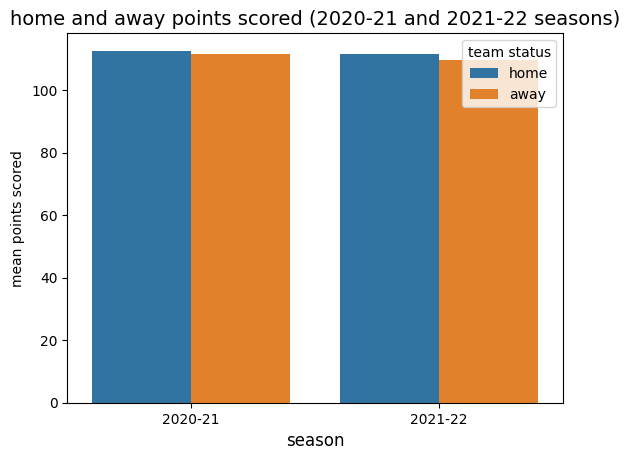

In [ ]:
covid_pts_20 = pd.read_sql_query("SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id IN (22021, 22020) ORDER BY season_id DESC", con)

covid_pts_20_group = covid_pts_20.groupby(['season_id']).agg({'pts_home': ['mean'], 'pts_away': ['mean']})
covid_pts_20_group.columns = ['home', 'away']
covid_pts_20_group = covid_pts_20_group.reset_index()
covid_pts_melt = pd.melt(covid_pts_20_group, id_vars=['season_id'], value_vars=['home', 'away'], var_name='team status', value_name='mean points scored')

ax = sns.barplot(data=covid_pts_melt, x='season_id', y='mean points scored', hue='team status')
ax.set_title('home and away points scored (2020-21 and 2021-22 seasons)', fontsize=14)
ax.set_xlabel('season', fontsize=12)
ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)
plt.show()


Falling Action: As fans returned in the 2022-23 season, the average home team points advantage continued to increase and reached 2.61 points. This increase may be due to the return of home fans leading to an increase in home court advantage, however additional analysis will be required to determine the cause of this increase.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\889110170.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


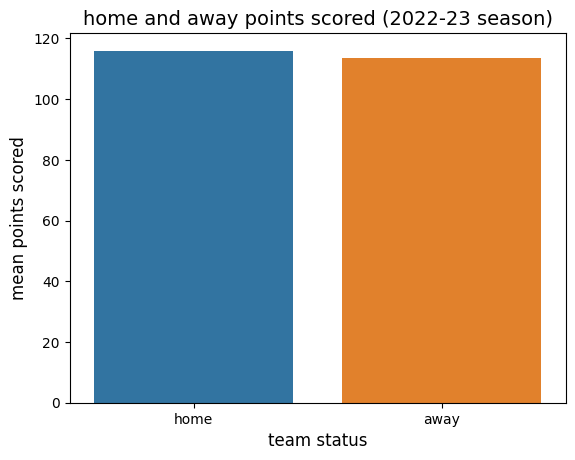

In [17]:
covid_pts_22 = pd.read_sql_query("SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id IN (22022) ORDER BY season_id DESC", con)

covid_pts_22_group = covid_pts_22.groupby(['season_id']).agg({'pts_home': ['mean'], 'pts_away': ['mean']})

ax = sns.barplot(data=covid_pts_22_group)
ax.set_title('home and away points scored (2022-23 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean points scored', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()


Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons may have had an impact on the level of home court advantage as measured by the difference between home and away points scored. However, that impact does not appear to be significant and recovered by the 2022-23 season.

Question 3

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions. 

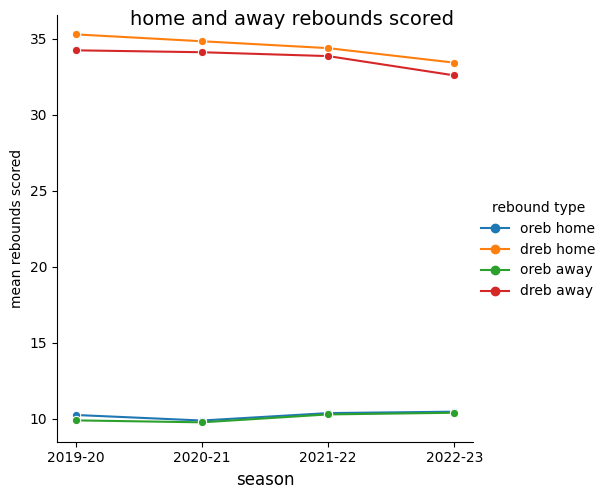

In [52]:
covid_reb = pd.read_sql_query("SELECT team_name_home, oreb_home, dreb_home, team_name_away, oreb_away, dreb_away, season_id FROM game WHERE season_id IN (22019, 22020, 22021, 22022) ORDER BY season_id DESC", con)

covid_reb_group = covid_reb.groupby(['season_id']).agg({'oreb_home': ['mean'], 'oreb_away': ['mean'],'dreb_home': ['mean'], 'dreb_away': ['mean']})
covid_reb_group.columns = ['oreb home', 'oreb away', 'dreb home', 'dreb away']
covid_reb_group=covid_reb_group.reset_index()
covid_reb_melt = pd.melt(covid_reb_group, id_vars=['season_id'], value_vars=['oreb home', 'dreb home', 'oreb away', 'dreb away'], var_name='rebound type', value_name='mean rebounds scored')

ax=sns.relplot(data=covid_reb_melt, x='season_id', y='mean rebounds scored', hue='rebound type', kind='line', marker='o')
ax.fig.suptitle('home and away rebounds scored', fontsize=14)
ax.set_xlabels('season', fontsize=12)
ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)
plt.show()

Rising Action: The third statistic we reviewed was the difference in average offensive and defensive rebounds scored by the home and away teams in each season. In the 2019-20 season, home teams scored an average of 0.38 more offensive rebounds and 0.95 defensive rebounds compared to away teams. While this does indicate a slight advantage towards home teams, it is less than a single rebound on average.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\3543713639.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['offensive', 'defensive'], fontsize=10)


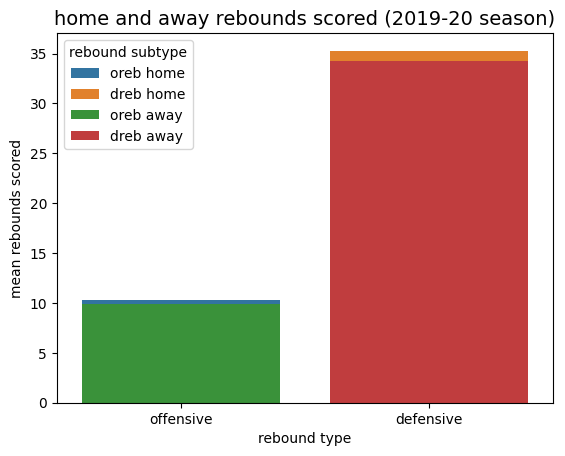

In [97]:
covid_reb_19 = pd.read_sql_query("SELECT team_name_home, oreb_home, dreb_home, team_name_away, oreb_away, dreb_away, season_id FROM game WHERE season_id IN (22019) ORDER BY season_id DESC", con)

covid_reb_19_group = covid_reb_19.groupby(['season_id']).agg({'oreb_home': ['mean'], 'oreb_away': ['mean'],'dreb_home': ['mean'], 'dreb_away': ['mean']})
covid_reb_19_group.columns = ['oreb home', 'oreb away', 'dreb home', 'dreb away']
covid_reb_19_group=covid_reb_19_group.reset_index()
covid_reb_19_melt = pd.melt(covid_reb_19_group, id_vars=['season_id'], value_vars=['oreb home', 'dreb home', 'oreb away', 'dreb away'], var_name='rebound subtype', value_name='mean rebounds scored')
covid_reb_19_melt['rebound type']=covid_reb_19_melt['rebound subtype'].str[:4]

ax = sns.barplot(data=covid_reb_19_melt, x='rebound type', y='mean rebounds scored', hue='rebound subtype', dodge=False)
ax.set_title('home and away rebounds scored (2019-20 season)', fontsize=14)
ax.set_xticklabels(['offensive', 'defensive'], fontsize=10)
plt.show()

Climax: This slight difference between home and away teams became even more slight following the introduction of COVID restrictions. Home teams scored only 0.15 more offensive rebounds on average in the 2020-21 season, with the difference reducing further to 0.07 rebounds in the 2021-22 season. On the defensive rebound side, the difference was cut almost in half by the 2021-22 season, with home teams scoring 0.54 more rebounds that away teams in that season. This could be an indication of a reduction of the level of home court advantage, although additional analysis is required to confirm this finding.

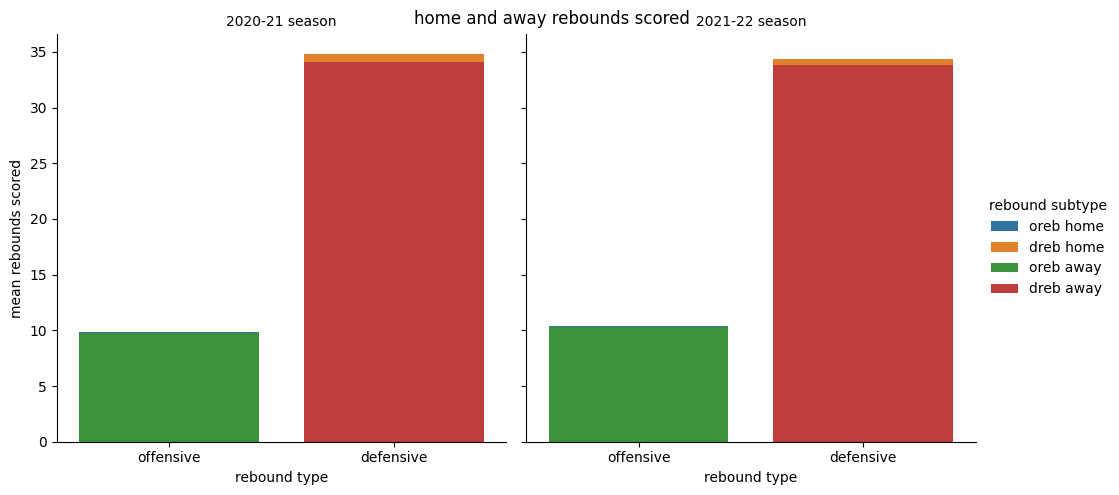

In [11]:
covid_reb_20 = pd.read_sql_query("SELECT team_name_home, oreb_home, dreb_home, team_name_away, oreb_away, dreb_away, season_id FROM game WHERE season_id IN (22020, 22021) ORDER BY season_id DESC", con)

covid_reb_20_group = covid_reb_20.groupby(['season_id']).agg({'oreb_home': ['mean'], 'oreb_away': ['mean'],'dreb_home': ['mean'], 'dreb_away': ['mean']})
covid_reb_20_group.columns = ['oreb home', 'oreb away', 'dreb home', 'dreb away']
covid_reb_20_group=covid_reb_20_group.reset_index()
covid_reb_20_melt = pd.melt(covid_reb_20_group, id_vars=['season_id'], value_vars=['oreb home', 'dreb home', 'oreb away', 'dreb away'], var_name='rebound subtype', value_name='mean rebounds scored')
covid_reb_20_melt['rebound type']=covid_reb_20_melt['rebound subtype'].str[:4]
covid_reb_20_melt = covid_reb_20_melt.replace('22020', '2020-21')
covid_reb_20_melt = covid_reb_20_melt.replace('22021', '2021-22')

ax = sns.catplot(data=covid_reb_20_melt, x='rebound type', y='mean rebounds scored', hue='rebound subtype', col='season_id', kind='bar', dodge=False)
ax.fig.suptitle('home and away rebounds scored')
ax.set_titles("{col_name} season")
ax.set_xticklabels(['offensive', 'defensive'])

plt.show()

In [9]:
covid_reb_20_melt

,season_id,rebound subtype,mean rebounds scored,rebound type
0,2020-21,oreb home,9.888889,oreb
1,2021-22,oreb home,10.378049,oreb
2,2020-21,dreb home,34.830556,dreb
3,2021-22,dreb home,34.377236,dreb
4,2020-21,oreb away,9.770370,oreb
5,2021-22,oreb away,10.290244,oreb
6,2020-21,dreb away,34.108333,dreb
7,2021-22,dreb away,33.854472,dreb


Falling Action: While the differences in average offensive and defensive rebounds both decreased following the introduction of COVID restrictions, the lifting of those restrictions did not result in a uniform increase. The average difference between home and away offensive rebounds actually continued to decrease, reaching 0.066 rebounds in the 2022-23 season. On the other hand, the average difference in defense rebounds rebounded to just under its original mark with an average difference of 0.94 rebounds in the 2022-23 season.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\1785803739.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['offensive', 'defensive'], fontsize=10)


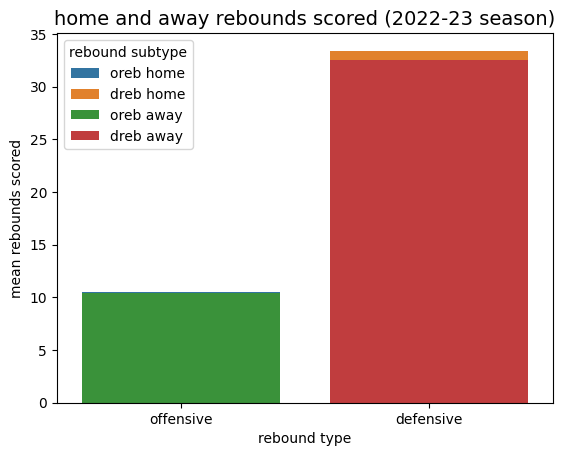

In [79]:
covid_reb_22 = pd.read_sql_query("SELECT team_name_home, oreb_home, dreb_home, team_name_away, oreb_away, dreb_away, season_id FROM game WHERE season_id IN (22022) ORDER BY season_id DESC", con)

covid_reb_22_group = covid_reb_22.groupby(['season_id']).agg({'oreb_home': ['mean'], 'oreb_away': ['mean'],'dreb_home': ['mean'], 'dreb_away': ['mean']})
covid_reb_22_group.columns = ['oreb home', 'oreb away', 'dreb home', 'dreb away']
covid_reb_22_group=covid_reb_22_group.reset_index()
covid_reb_22_melt = pd.melt(covid_reb_22_group, id_vars=['season_id'], value_vars=['oreb home', 'dreb home', 'oreb away', 'dreb away'], var_name='rebound subtype', value_name='mean rebounds scored')
covid_reb_22_melt['rebound type']=covid_reb_22_melt['rebound subtype'].str[:4]

ax = sns.barplot(data=covid_reb_22_melt, x='rebound type', y='mean rebounds scored', hue='rebound subtype', dodge=False)
ax.set_title('home and away rebounds scored (2022-23 season)', fontsize=14)
ax.set_xticklabels(['offensive', 'defensive'], fontsize=10)
plt.show()

Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons may have had an impact on home court advantage as measured by the difference in average offensive and defensive rebounds between home and away teams. However, that impact does not appear to be significant.

Question 4

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions. 

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\3635763601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)


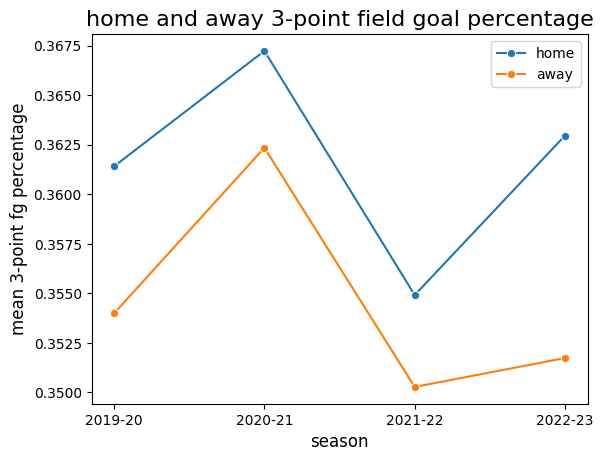

In [107]:
result = []
for year in seasons:
    fg3_query = f"""
    SELECT 
        AVG(fg3_pct_home) AS avg_fg3_pct_home,
        AVG(fg3_pct_away) AS avg_fg3_pct_away
    FROM game
    WHERE SUBSTR(season_id, -4) = '{year}'
    """
    
    fg3_data = pd.read_sql_query(fg3_query, con)
    
    if not fg3_data.empty:
        avg_fg3_pct_home = fg3_data['avg_fg3_pct_home'][0]
        avg_fg3_pct_away = fg3_data['avg_fg3_pct_away'][0]
        
        result.append({
            'season_year': year,
            'avg_fg3_pct_home': avg_fg3_pct_home,
            'avg_fg3_pct_away': avg_fg3_pct_away
        })

result_df = pd.DataFrame(result)
ax = sns.lineplot(data=result_df, x='season_year', y='avg_fg3_pct_home', label='home', marker='o')
sns.lineplot(data=result_df, x='season_year', y='avg_fg3_pct_away', label='away', marker='o')
plt.xlabel('season', fontsize=12)
plt.ylabel('mean 3-point fg percentage', fontsize=12)
plt.title('home and away 3-point field goal percentage', fontsize=16)
ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)
plt.legend()
plt.show()

Rising action: The fourth statistic we reviewed was the difference in the average succcessful three-point field goal percentage by home and away teams. In the 2019-20 season, home teams successfully scored slightly more field goals on average compared to away teams (36.1% vs 35.4%), however that difference is less than a percentage point and may not be statistically significant.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\4274606601.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


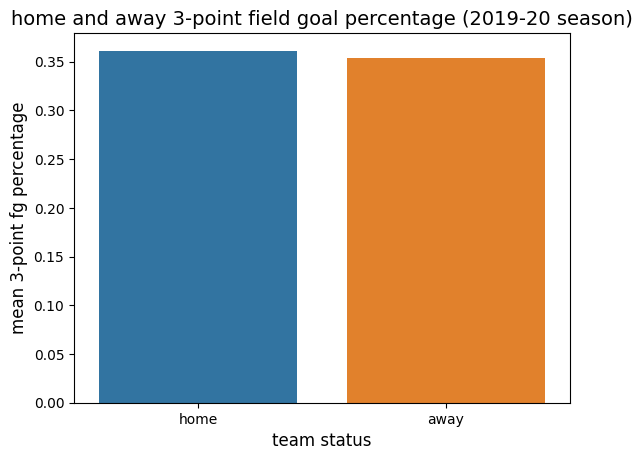

In [113]:
covid_fg3_19 = pd.read_sql_query("SELECT team_name_home, fg3_pct_home, team_name_away, fg3_pct_away, season_id FROM game WHERE season_id IN (22019) ORDER BY season_id DESC", con)

covid_fg3_19_group = covid_fg3_19.groupby(['season_id']).agg({'fg3_pct_home': ['mean'], 'fg3_pct_away': ['mean']})

ax = sns.barplot(data=covid_fg3_19_group)
ax.set_title('home and away 3-point field goal percentage (2019-20 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean 3-point fg percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

Climax: The difference continued to be relatively minor as COVID restrictions were instituted. While home teams continued to successfully score slightly more three-point field goals on average compared to away teams, they only scored 0.5 percentage points more in the 2020-21 and 2021-22 seasons. The raw percentage of field goals scored by both home and away teams did decrease slightly in the 2021-22 season, however that decrease may not be significant.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\2815153051.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)


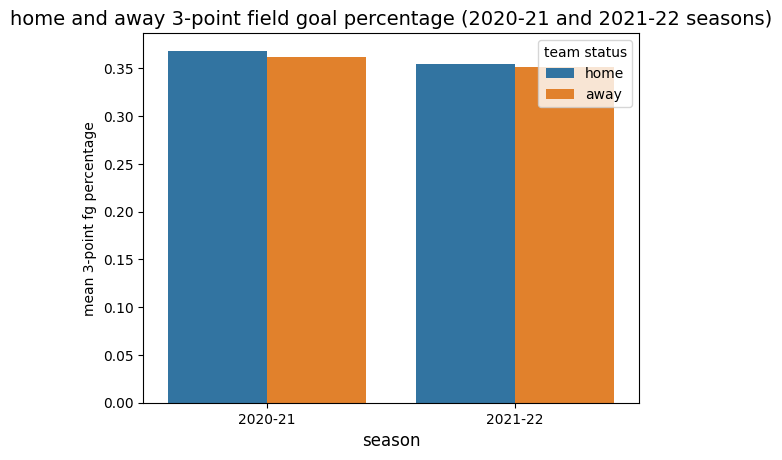

In [116]:
covid_fg3_20 = pd.read_sql_query("SELECT team_name_home, fg3_pct_home, team_name_away, fg3_pct_away, season_id FROM game WHERE season_id IN (22021, 22020) ORDER BY season_id DESC", con)

covid_fg3_20_group = covid_fg3_20.groupby(['season_id']).agg({'fg3_pct_home': ['mean'], 'fg3_pct_away': ['mean']})
covid_fg3_20_group.columns = ['home', 'away']
covid_fg3_20_group = covid_fg3_20_group.reset_index()
covid_pts_melt = pd.melt(covid_fg3_20_group, id_vars=['season_id'], value_vars=['home', 'away'], var_name='team status', value_name='mean 3-point fg percentage')

ax = sns.barplot(data=covid_pts_melt, x='season_id', y='mean 3-point fg percentage', hue='team status')
ax.set_title('home and away 3-point field goal percentage (2020-21 and 2021-22 seasons)', fontsize=14)
ax.set_xlabel('season', fontsize=12)
ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)
plt.show()

Falling action: As COVID restrictions lifted in the 2022-23 season, the average successful three-point field goal percentage returned to rougly the values observed in the 2019-20 season, with the home average slightly above and the away percentage slightly below. Overall, the shift in the two percentages over the four seasons in our sample was less than two percentage points.

C:\Users\emmet\AppData\Local\Temp\ipykernel_18736\736553347.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


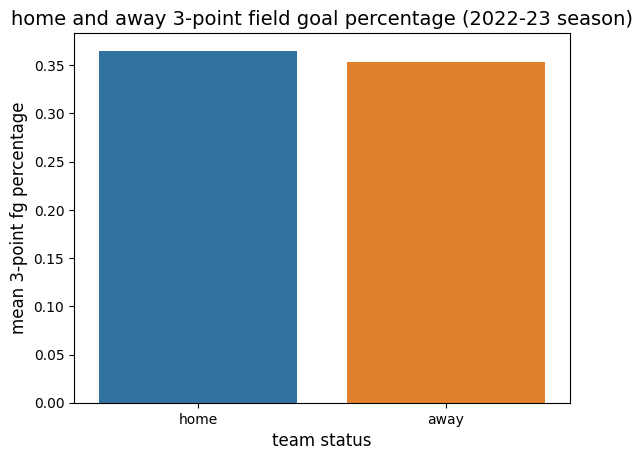

In [114]:
covid_fg3_22 = pd.read_sql_query("SELECT team_name_home, fg3_pct_home, team_name_away, fg3_pct_away, season_id FROM game WHERE season_id IN (22022) ORDER BY season_id DESC", con)

covid_fg3_22_group = covid_fg3_22.groupby(['season_id']).agg({'fg3_pct_home': ['mean'], 'fg3_pct_away': ['mean']})

ax = sns.barplot(data=covid_fg3_22_group)
ax.set_title('home and away 3-point field goal percentage (2022-23 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean 3-point fg percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons did not appear to have had a significant impact on home court advantage as measured by the difference in the successful three-point field goal percentage between home and away teams.

Question 5

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions. 

C:\Users\emmet\AppData\Local\Temp\ipykernel_21032\2364657762.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)


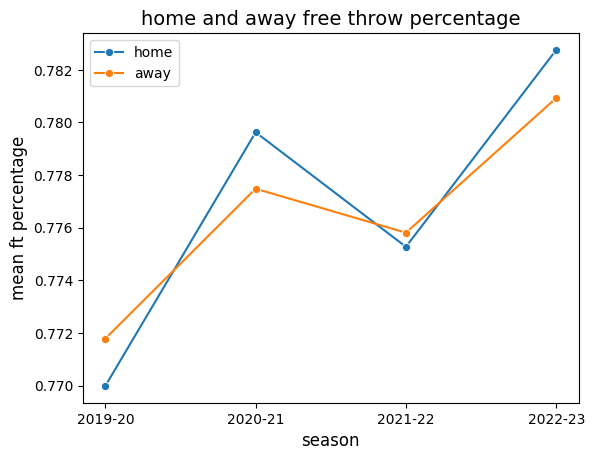

In [7]:
covid_ft = pd.read_sql_query("SELECT team_name_home, ft_pct_home, team_name_away, ft_pct_away, season_id FROM game WHERE season_id IN (22019, 22020, 22021, 22022) ORDER BY season_id DESC", con)

covid_ft_group = covid_ft.groupby(['season_id']).agg({'ft_pct_home': ['mean'], 'ft_pct_away': ['mean']})
covid_ft_group.columns = ['home', 'away']

sns.lineplot(data=covid_ft_group, x='season_id', y='home', label='home', marker='o')
ax = sns.lineplot(data=covid_ft_group, x='season_id', y='away', label='away', marker='o')
ax.set_title('home and away free throw percentage', fontsize=14)
ax.set_xlabel('season', fontsize=12)
ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)
ax.set_ylabel('mean ft percentage', fontsize=12)
plt.show()

Rising Action: The final statistic we reviewed was the difference in the average succcessful free throw percentage by home and away teams. In the 2019-20 season, away teams actually made slightly more free throws on average compared to home teams (77.24% vs 77.18%). However, that difference likely does not indicate a significant advantaage.

C:\Users\emmet\AppData\Local\Temp\ipykernel_21032\1859778958.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


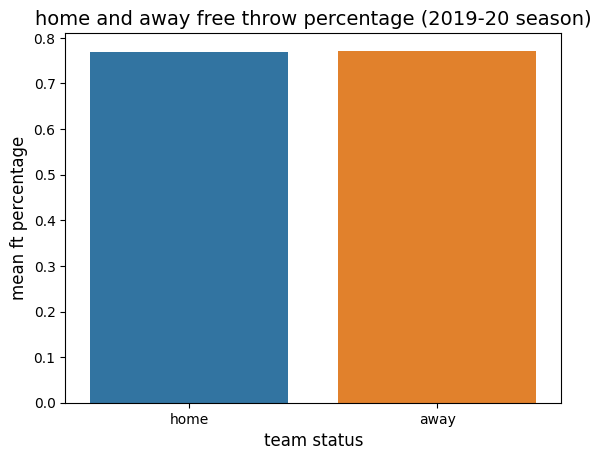

In [4]:
covid_ft_19 = pd.read_sql_query("SELECT team_name_home, ft_pct_home, team_name_away, ft_pct_away, season_id FROM game WHERE season_id IN (22019) ORDER BY season_id DESC", con)

covid_ft_19_group = covid_ft_19.groupby(['season_id']).agg({'ft_pct_home': ['mean'], 'ft_pct_away': ['mean']})

ax = sns.barplot(data=covid_ft_19_group)
ax.set_title('home and away free throw percentage (2019-20 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean ft percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

Climax: The difference continued to be relatively minor as COVID restrictions were instituted. The successful free trow percentages for home and away teams remained within half a percentage point in both the 2020-21 and 2021-22 seasons, with home teams having a slightly higher percentage in the former season and away teams having a slightly higher percentage in the latter. None of these differences appear to be significant.

C:\Users\emmet\AppData\Local\Temp\ipykernel_21032\4244484068.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)


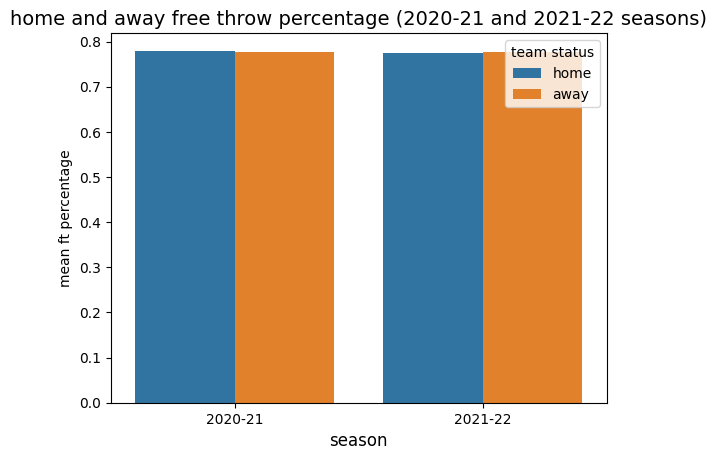

In [6]:
covid_ft_20 = pd.read_sql_query("SELECT team_name_home, ft_pct_home, team_name_away, ft_pct_away, season_id FROM game WHERE season_id IN (22021, 22020) ORDER BY season_id DESC", con)

covid_ft_20_group = covid_ft_20.groupby(['season_id']).agg({'ft_pct_home': ['mean'], 'ft_pct_away': ['mean']})
covid_ft_20_group.columns = ['home', 'away']
covid_ft_20_group = covid_ft_20_group.reset_index()
covid_pts_melt = pd.melt(covid_ft_20_group, id_vars=['season_id'], value_vars=['home', 'away'], var_name='team status', value_name='mean ft percentage')

ax = sns.barplot(data=covid_pts_melt, x='season_id', y='mean ft percentage', hue='team status')
ax.set_title('home and away free throw percentage (2020-21 and 2021-22 seasons)', fontsize=14)
ax.set_xlabel('season', fontsize=12)
ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)
plt.show()

Falling Action: This pattern continued into the 2022-23 season. While both percentages rose slightly, they remained within half a percentage point of each other. Home teams also returned to having a slightly higher average percentage, albiet by 0.2 percentage points.


C:\Users\emmet\AppData\Local\Temp\ipykernel_21032\245006016.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


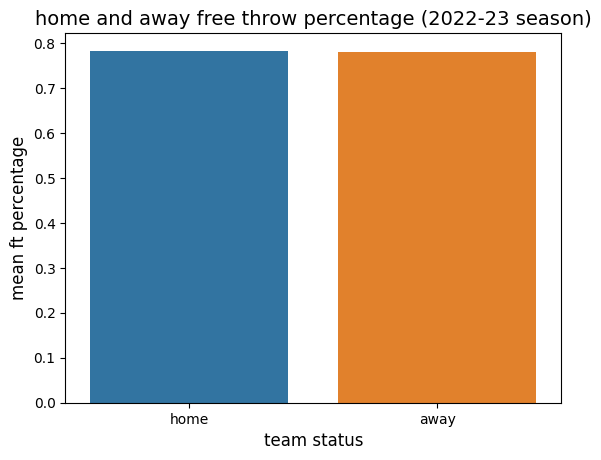

In [5]:
covid_ft_22 = pd.read_sql_query("SELECT team_name_home, ft_pct_home, team_name_away, ft_pct_away, season_id FROM game WHERE season_id IN (22022) ORDER BY season_id DESC", con)

covid_ft_22_group = covid_ft_22.groupby(['season_id']).agg({'ft_pct_home': ['mean'], 'ft_pct_away': ['mean']})

ax = sns.barplot(data=covid_ft_22_group)
ax.set_title('home and away free throw percentage (2022-23 season)', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('mean ft percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons did not appear to have had a significant impact on home court advantage as measured by the difference in the successful free throw percentage between home and away teams.

In [ ]:
con.close()